In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import seaborn as sns
import math
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
data = pd.read_excel('data.xlsx')
data.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Close_ETF    1000 non-null float64
oil          1000 non-null float64
gold         1000 non-null float64
JPM          1000 non-null float64
dtypes: float64(4)
memory usage: 31.4 KB


# Part 7

H0: µ_G == µ_O 

Ha: µ_G != µ_O 

In [11]:
stats.ttest_ind(data.gold,data.oil)

Ttest_indResult(statistic=-0.48536661382360874, pvalue=0.6274695258306375)

Since the p value is greater than 0.05 . Therefore, we will not reject the null hypothesis

H0: µ_G - µ_O == 0

Ha: µ_G - µ_O != 0

In [13]:
mean_diff = data.oil - data.gold
stats.ttest_1samp(mean_diff,0)

Ttest_1sampResult(statistic=0.5413309278514735, pvalue=0.5884002009146817)

H0: σ_G == σ_O

Ha: σ_G != σ_O

In [14]:
std_gold = stats.sem(data.gold)
std_oil = stats.sem(data.oil)

In [15]:
F = (std_gold)**2 / (std_oil)**2
stats.f.cdf(F, 999, 999)

3.942299795895072e-82

Since P value is way less 0.05, so we would reject the null hypothesis at this case. 

# Part 8

Text(0.5, 1.0, 'Scatter Plot for Close_ETF and gold')

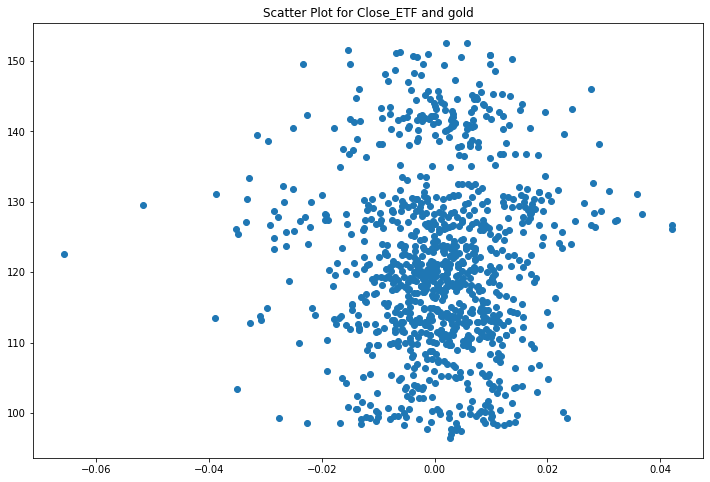

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(data.gold,data.Close_ETF)
plt.title('Scatter Plot for Close_ETF and gold')

 The graph does not show linear relationship between the two variables.

In [17]:
np.corrcoef(data.gold,data.Close_ETF)

array([[1.        , 0.02299557],
       [0.02299557, 1.        ]])

The coefficient is 0.023 which is very close to 0, sothere is very weak linear relationship between close ETF and gold.

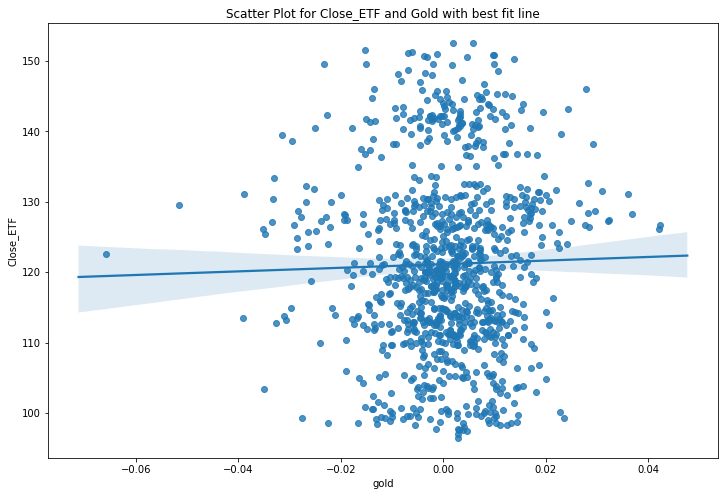

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(data.gold, data.Close_ETF)
plot = plt.title('Scatter Plot for Close_ETF and Gold with best fit line')

In [23]:
np.polyfit(data.gold, data.Close_ETF, deg=1)

array([ 25.60438932, 121.1359885 ])

Close_ETF = 25.60438932*gold + 121.1359885

In [26]:
X = data['gold']
Y = data['Close_ETF']
X = sm.add_constant(X)

D:\Develop\python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
ols = sm.OLS(Y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5280
Date:                Mon, 30 Nov 2020   Prob (F-statistic):              0.468
Time:                        01:33:11   Log-Likelihood:                -3949.5
No. Observations:                1000   AIC:                             7903.
Df Residuals:                     998   BIC:                             7913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1360      0.398    304.155      0.000     120.354     121.918
gold          25.6044     35.236      0.727      0.468     -43.541      94.750
==============================================================================
Omnibus:                       26.752   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.045
Skew:                           0.305   Prob(JB):                     9.91e-06
Kurtosis:                       2.576   Cond. No.                         88.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
t = 25.6044/35.236
df = 1000-2
p = 1 - stats.t.cdf(t,df)
print('t value is {} and p value is {}.'.format(t,2*p))

t value is 0.7266545578385742 and p value is 0.46760799530738817.


Since the p value is 0.468 which is greater than significant level 0.05, we will not reject 
the null hypothesis beta 1 = 0 and claim that there is no linear relationship between ETF and Gold.

We get the coefficients 121.136 and 25.6044 from table, so the linear model is f(x)=121.136+25.6044*x.

However, based on the low R square, 0.001, the model is not well fitted.

In [39]:
# CI for mean daily ETF 
fx = 121.136 + 25.6044* data.gold
stats.norm.interval(alpha=0.99, loc=121.136+25.6044*np.mean(data.gold), scale= stats.sem(fx))

(121.12942702006666, 121.17651602028926)

In [42]:
# CI for individual daily ETF 
stats.norm.interval(alpha = 0.99,loc = 121.136+25.6044*0.005127, scale = stats.sem(fx))

(121.2437292586887, 121.2908182589113)